# Measurements: a common sense view

### Goals:

1. Establish a common-sense understanding about how to interpret a set of measurements using a histogram.
2. Gain practical knowledge of simple statistics, such as mean, median and standard deviation, by comparing them to our common-sense understanding.
3. Contemplate the grandeur of the universe and the mind-blowing fact that it is expanding.

### Timing

Try to finish this notebook in 20-25 minutes



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

### New functions we will use is this module:

| Function Name  | What it does |
| - | - |
| numpy.loadtxt  | reads values from a text file |
| numpy.mean     | returns the mean of a set of values |
| numpy.median   | returns the median of a set of values |
| numpy.min      | returns the mininum of a set of values |
| numpy.max      | returns the maximum of a set of values |
| numpy.abs      | returns the absolute value of each of a set of values |
| numpy.std      | returns the standard deviation of a set of values |
| numpy.sqrt     | returns the square root of each of a set of values |
| numpy.hstack   | "Stacks" arrays, can be used to append values to an array |
| array[:,i]     | returns the ith column from a 2-dimensional array |

### Scientific Context

We are going to be discussing recent measurements of the Hubble parameter, $H_0$, which is a measure of the expansion of the universe.  It tells us how quickly distant objects are moving away from us.

Traditionally the Hubble parameter is given in units of kilometers per second per megaparsec: $\frac{{\rm km}}{{\rm s}}{\rm Mpc}^{-1}$, that is to say, a velocity per distance. That can be a bit confusing, but you can think of it as: "An object 1 Mpc away from us will be moving away from us at $H_0$ km/s, an object twice as far away will be moving away from us twice as fast, and so on."

A megaparsec is about 3,260,000 light years, and is about the distance to the closest Galaxies.  We regularly detect galaxies that are over a billion light years away from us, and which are moving away from us at a large fraction of the speed of light.  We will talk more about this later in the course.

In the last 30 years or so, we have started to be able to make precise measurements of the Hubble parameter.

For the purposes of this lab, that is about all that you need to know.  But it is a truly fascinating topic.

### Here is a figure illustrating how the Hubble constant is measured

The data points show the velocity at which distant galaxies are moving away from us, plotted against their distance from us.

Note that there is some scatter in the data points, they don't all lie perfectly along the line.

The slope of the line is the Hubble constant.  It gives the relationship between distance and velocity for these faraway galaxies.

<img src="figures/hubble_constant_far.jpg" alt="drawing" width="40%"/>

## Questions for discussion:

#### 6.1 Explain this plot (and how you would use it to estimate the Hubble constant) in your own words. 

### Measurement of the Hubble constant.

There have been many, many different measurements of the Hubble constant.  We will go more into the different measurements later in this module, and in later labs, but for now we are going just going to look at some of the values that people have found.

We've put a bunch of the values into table in a text file.  The next command will load it.

In [2]:
data = np.loadtxt(open("../data/Hubble.txt", 'rb'), usecols=[1,2,3])

These data are in the form of a table with three columns, the first column is the measured value and the next two columns are the estimated uncertainties.  Let's have a look:

In [3]:
data

array([[72.1 ,  2.  ,  2.  ],
       [73.2 ,  1.3 ,  1.3 ],
       [73.5 ,  5.3 ,  5.3 ],
       [71.8 ,  3.9 ,  3.3 ],
       [67.6 ,  4.3 ,  4.2 ],
       [75.8 ,  5.2 ,  4.9 ],
       [73.9 ,  3.  ,  3.  ],
       [74.2 ,  2.7 ,  3.  ],
       [76.8 ,  2.6 ,  2.6 ],
       [73.3 ,  1.36,  1.35],
       [73.5 ,  1.4 ,  1.4 ],
       [69.8 ,  1.9 ,  1.9 ],
       [73.3 ,  1.7 ,  1.8 ],
       [70.3 ,  5.3 ,  5.  ],
       [68.  ,  4.2 ,  4.1 ],
       [74.03,  1.42,  1.42],
       [67.78,  0.91,  0.87],
       [67.77,  1.3 ,  1.3 ],
       [72.5 ,  2.1 ,  2.3 ],
       [67.66,  0.42,  0.42],
       [73.52,  1.62,  1.62],
       [73.45,  1.66,  1.66],
       [70.  , 12.  ,  8.  ],
       [71.9 ,  2.4 ,  3.  ],
       [76.2 ,  3.4 ,  2.7 ],
       [67.6 ,  0.7 ,  0.6 ],
       [73.24,  1.74,  1.74],
       [67.74,  0.46,  0.46],
       [74.4 ,  3.  ,  3.  ],
       [67.8 ,  0.77,  0.77],
       [69.32,  0.8 ,  0.8 ],
       [70.4 ,  1.3 ,  1.4 ],
       [71.  ,  2.5 ,  2.5 ],
       [70

In [4]:
# This is how we pull out the data from columns in the array.
H0_measured = data[:,0]
H0_errorLow = data[:,1]
H0_errorHigh = data[:,2]
N_measurements = H0_measured.size
print(H0_measured)

[72.1  73.2  73.5  71.8  67.6  75.8  73.9  74.2  76.8  73.3  73.5  69.8
 73.3  70.3  68.   74.03 67.78 67.77 72.5  67.66 73.52 73.45 70.   71.9
 76.2  67.6  73.24 67.74 74.4  67.8  69.32 70.4  71.   70.5  71.9  70.4
 76.9  72.  ]


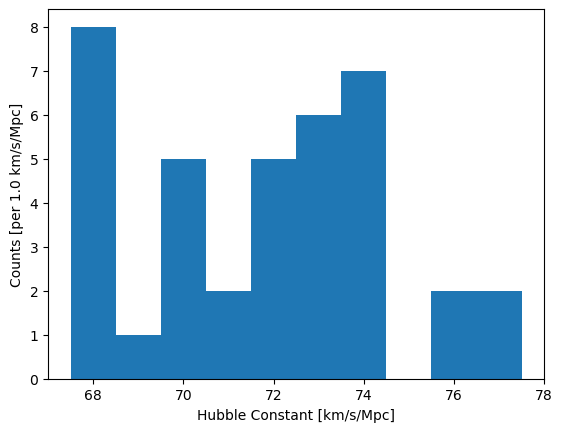

In [5]:
plt.hist(H0_measured, bins=np.linspace(67.5, 77.5, 11))
plt.xlabel("Hubble Constant [km/s/Mpc]")
plt.ylabel("Counts [per 1.0 km/s/Mpc]")
plt.show()

## Questions for discussion:

#### 7.1 What can we learn just by looking at the chart?  

#### 7.2 Just by looking at the chart, what is your best guess as to the true value of the Hubble constant?

#### 7.3 Just by looking at the chart, what would you estimate the uncertainty of the Hubble constant to be?  

## Quantifying our intuition

We are going to review some simple statistics and discuss how they are calculated.

**mean ($\mu$):** The average, the sum of the values divided by the number of values (N):  $\mu = \sum_i x_i / N$

**median:** The "middle" value, i.e., the value that would be in the middle if we sorted them numerically

**mode:** The "most common" value, i.e., the value that occurs most often

In [6]:
# We can use simple numpy functions to get the mean and the median
H0_mean = np.mean(H0_measured)
H0_median = np.median(H0_measured)

In [7]:
# The "mode" depends on how we bin up the data. 
# It is the center of the bin that has the most counts.  
# This little piece of code computes the mode
H0_hist = np.histogram(H0_measured, bins=np.linspace(67.5, 77.5, 11))
H0_binCounts = H0_hist[0]
H0_binEdges = H0_hist[1]
H0_binCenters = 0.5*(H0_binEdges[1:] + H0_binEdges[0:-1])
H0_mode = H0_binCenters[np.argmax(H0_binCounts)]

In [8]:
print("Mean:   ", H0_mean)
print("Median: ", H0_median)
print("Mode:   ", H0_mode)

Mean:    71.71342105263159
Median:  71.95
Mode:    68.0


## Questions for discussion:

#### 8.1 Which of these statistics would you think gives the "best" estimate of the true value of the Hubble parameter, and why?  

### Quantifying the scatter of the measurements / uncertainty of the best estimate of the Hubble Parameter

Earlier we asked you how you estimate the uncertainty on the Hubble parameter given the set of measurements.  Now we are going to discuss the standard ways of doing that.

Let's consider a few different ways of doing that, try them all blindly, and then we can think a bit about the significance of each.

  1. Taking the extrema:  max - min
  2. Taking the average of the absolute values of the differences from the mean: $ \frac{1}{N} \sum|x_i - \mu|$.
  3. The "standard deviation", similar to 2 above, but we take and average of the square of the diffences, and then take a square root of this average: $\sigma = \sqrt{ \frac{1}{N} \sum (x_i - \mu)^2}$.  
  4. The "standard error", similar to the 3 above, but we divide the result by the square root of the number of measurements: $\sigma / \sqrt{N}$

In [9]:
print("Max - min:          %0.2f" % (np.max(H0_measured) - np.min(H0_measured)))
print("Average deviation:  %0.2f" % (np.mean(np.abs(H0_measured - np.mean(H0_measured)))))
print("Standard deviation: %0.2f" % (np.std(H0_measured)))
print("Standard error:     %0.2f" % (np.std(H0_measured)/np.sqrt(N_measurements)))

Max - min:          9.30
Average deviation:  2.30
Standard deviation: 2.73
Standard error:     0.44


### Questions for discussion

#### 9.1 Which of these estimates would you use to characterize the uncertainty on the Hubble parameter? Why?

#### 9.2 To some extent, this depends on agreeing on what we mean when we say "uncertainty".  What do you think might be a reasonable convention for quantifying the "uncertainty" of a measurement?

#### 9.3 Sometimes it may make sense to quote more than one of these estimates when describing data.  What might be some reasons for that?

### Differences between these estimates of the scatter of the measurements.

At this point it is probably worth understanding what each of these quantities represents and the differences between them.  Here are some questions to help understand that.




### Effect of a single measurment

The next few cells help us study the effect that a single measurment can have.

So, let's pretend that as we are going through the set of Hubble constant measurements we find an old paper that measure a value of 153 km/s/Mpc. Let's see how that affects our results. 

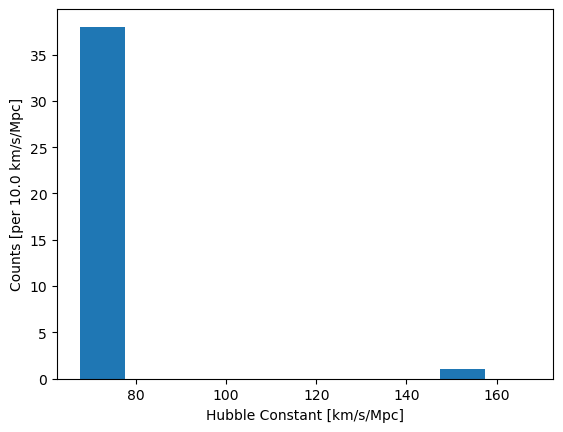

[ 72.1   73.2   73.5   71.8   67.6   75.8   73.9   74.2   76.8   73.3
  73.5   69.8   73.3   70.3   68.    74.03  67.78  67.77  72.5   67.66
  73.52  73.45  70.    71.9   76.2   67.6   73.24  67.74  74.4   67.8
  69.32  70.4   71.    70.5   71.9   70.4   76.9   72.   153.  ]


In [10]:
# Note this histogram has the same number of bins as the previous one, but includes the new data point
H0_Historical = np.hstack([H0_measured, np.array([153.])])
H0_hist = plt.hist(H0_Historical, bins=np.linspace(67.5, 167.5, 11))
plt.xlabel("Hubble Constant [km/s/Mpc]")
plt.ylabel("Counts [per 10.0 km/s/Mpc]")
plt.show()

print(H0_Historical)

In [11]:
print("New Mean:   %0.2f" % np.mean(H0_Historical))
print("New Median: %0.2f" % np.median(H0_Historical))
print("New stdev:  %0.2f" % np.std(H0_Historical))


New Mean:   73.80
New Median: 72.00
New stdev:  13.13


In [12]:
print("Change in Mean:   %0.2f " % (np.mean(H0_Historical) - np.mean(H0_measured)))
print("Change in Median: %0.2f " % (np.median(H0_Historical) - np.median(H0_measured)))
print("Change in stdev:  %0.2f " % (np.std(H0_Historical) - np.std(H0_measured)))

Change in Mean:   2.08 
Change in Median: 0.05 
Change in stdev:  10.40 


## Questions for discussion:

#### 10.1 What should we do about this new measurement?  

#### 10.2 What does this suggest about using the mean or the median to summarize a set of measurements?  What about which statistic we might use to characterize the uncertainty?